<a href="https://colab.research.google.com/github/juhee3199/Machine-learning_advanced-study/blob/juhee3199-basic_code/Ensemble-Voting%26Bagging(RandomForest).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Voting Classifer

- Voting:
      여러 개의 서로 다른 알고리즘이 같은 데이터셋에 대해 학습하고 예측한 결과를 투표하여 최종 예측
      hard voting: 다수결 원칙
      soft voting: 각 분류기의 레이블값 예측확률을 평균내서 확률이 가장 높은 레이블 값으로 최종 예측


- voting classifier 예제 문제
  - 사이킷런의 VotingClassifier 클래스 사용 (default: hard voting)
  - 로지스틱 회귀와 KNN을 기반으로 보팅 분류기 생성
  - 위스콘신 유방암 데이터셋 사용 : 유방암의 악성/양성 종양 여부를 결정하는 이진 분류 데이터셋


In [1]:
import pandas as pd

from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

cancer = load_breast_cancer()

data_df = pd.DataFrame(cancer.data, columns = cancer.feature_names)
data_df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


soft 보팅 기반의 앙상블 모델로 구현한 분류기

In [22]:
# 개별 분류기 생성 - Logistic regression, KNN
lr_clf = LogisticRegression()
knn_clf = KNeighborsClassifier(n_neighbors=8)

# 개별 모델을 소프트 보팅 기반의 앙상블 모델로 구현한 분류기 
vo_clf = VotingClassifier( estimators=[('LR',lr_clf),('KNN',knn_clf)] , voting='soft' )

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, 
                                                    test_size=0.2 , random_state= 156)

vo_clf.fit(x_train, y_train)
pred = vo_clf.predict(x_test)
print('soft voting 분류기 정확도: {0:.4f}'.format(accuracy_score(y_test, pred)))


# 개별 모델의 학습/예측 평가
classifiers = [lr_clf, knn_clf]
for classifier in classifiers:
    classifier.fit(x_train , y_train)
    pred = classifier.predict(x_test)
    class_name= classifier.__class__.__name__
    print('{0} 정확도: {1:.4f}'.format(class_name, accuracy_score(y_test , pred)))

soft voting 분류기 정확도: 0.9474
LogisticRegression 정확도: 0.9386
KNeighborsClassifier 정확도: 0.9386


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [23]:
# 위의 개별 분류기로 hard 보팅 기반의 앙상블 모델 구현해보기
vo_clf = VotingClassifier(estimators=[('LR',lr_clf), ('KNN', knn_clf)], voting='hard')

x_train, x_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.2, random_state=156)

vo_clf.fit(x_train, y_train)
pred = vo_clf.predict(x_test)
print('hard voting 분류기 정확도: {0:.4f}'.format(accuracy_score(y_test, pred)))

hard voting 분류기 정확도: 0.9386


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


# 2. Bgging - RandomForest
- Bagging:
      같은 유형의 여러 알고리즘이 데이터 샘플링을 각각 다르게 하여 학습을 수행하고, 이후 보팅을 수행
      Bootstrapping(부트스트래핑): 개별 classifier에게 데이터를 샘플링해서 추출하는 방식

- RandomForest: Bagging의 대표적인 알고리즘. 
      DecisionTree알고리즘을 기반으로 한다. 쉽고 직관적임
      앙상블 알고리즘 중 비교적 빠른 수행 속도
      Bootstrapping분할 방식을 통해 중첩되게 샘플링된 데이터를 사용


In [29]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()
data_df = pd.DataFrame(cancer.data, columns = cancer.feature_names)
x_train, x_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.2, random_state=0)

In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf_clf = RandomForestClassifier(random_state=0)  # default: n_estimators=10
rf_clf.fit(x_train, y_train)
pred = rf_clf.predict(x_test)
accuracy = accuracy_score(y_test, pred)
print('랜덤 포레스트 정확도: {0:.4f}'.format(accuracy))

랜덤 포레스트 정확도: 0.9649


In [36]:
# GridSearchCV를 이용한 하이퍼 파라미터 조정
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators':[100],
    'max_depth':[6, 8, 10, 12],
    'min_samples_leaf':[8,12,19],
    'min_samples_split':[8,16,20]
}

rf_clf = RandomForestClassifier(random_state=0, n_jobs = -1)
grid_cv = GridSearchCV(rf_clf, param_grid = params, cv=2, n_jobs=-1)
grid_cv.fit(x_train, y_train)

print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터:
 {'max_depth': 6, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 100}
최고 예측 정확도: 0.9451


In [53]:
pred = grid_cv.best_estimator_.predict(x_test)
accuracy = accuracy_score(y_test, pred)
print('GridCV 정확도: {0:.4f}'.format(accuracy))

GridCV 정확도: 0.9649


In [39]:
# n_estimator를 300으로 변경해보기

rf_clf = RandomForestClassifier(n_estimators = 300, max_depth=6, min_samples_leaf=8, min_samples_split= 8,random_state=0, n_jobs = -1)
rf_clf.fit(x_train, y_train)
pred = rf_clf.predict(x_test)
accuracy = accuracy_score(y_test, pred)
print('하이퍼 파라미터 조정 후 예측 정확도: {0:.4f}'.format(accuracy))

# --> test데이터셋에 대해 n_estimator 변경이 의미가 없음

하이퍼 파라미터 조정 후 예측 정확도: 0.9649


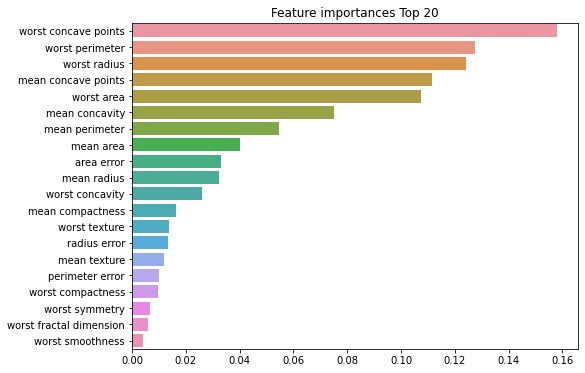

In [52]:
# feature 중요도 시각화

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ftr_importances_values = rf_clf.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index = cancer.feature_names)
#ftr_importances
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize = (8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()